In [39]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX


## 简单线性回归的实现

$$
a=\frac{\sum_{i=1}^{m}\left(x^{(i)}-\bar{x}\right)\left(y^{(i)}-\bar{y}\right)}{\sum_{i=1}^{m}\left(x^{(i)}-\bar{x}\right)^{2}}
$$

$$
b=\bar{y}-a \bar{x}
$$

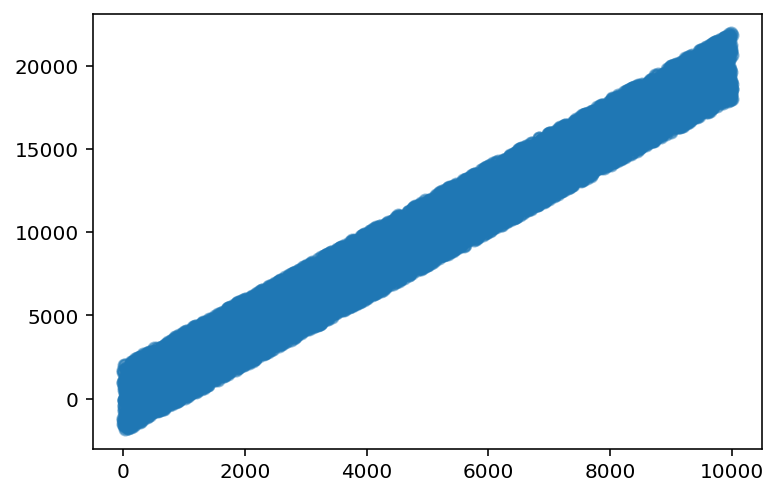

In [36]:
x = np.arange(10000)
y = x * 2 + np.random.randint(-2000,2000, size=10000)
plt.scatter(x, y, alpha=0.5)

### 线性回归实现

In [24]:
class SimpleLinerRegression():
    def __init__(self):
        self.a = 0
        self.b = 0
    
    def fit(self, x, y):
        x_avg = x.mean()
        y_avg = y.mean()

        molecule = 0
        for x_item, y_item in zip(x, y):
            molecule += (x_item-x_avg) * (y_item-y_avg)

        denominator = 0
        for item in x:
            denominator += pow((item-x_avg), 2)

        self.a = molecule / denominator
        self.b = y_avg - self.a * x_avg

    def predict(self, x):
        return x * self.a + self.b    


CPU times: user 101 ms, sys: 2.19 ms, total: 103 ms
Wall time: 104 ms
a= 1.9950974737929752
b= 37.33067977201972


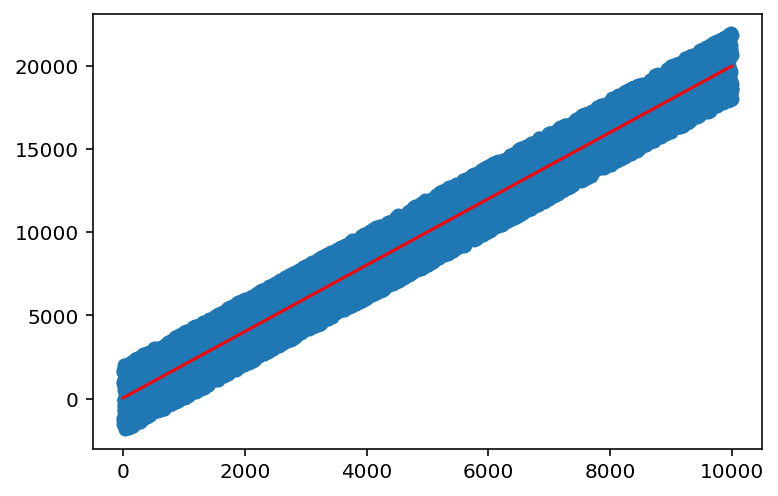

In [37]:
obj =  SimpleLinerRegression()
%time obj.fit(x, y)
y_predict = obj.predict(x)

print('a=', obj.a)
print('b=', obj.b)

plt.scatter(x, y)
plt.plot(x, y_predict, color='r')

### 使用向量计算优化
使用向量计算，避免走循环计算。可以大幅度提高效率。

In [45]:
class SimpleLinerRegression2():
    def __init__(self):
        self.a = 0
        self.b = 0
    
    def fit(self, x, y):
        x_avg = x.mean()
        y_avg = y.mean()

        molecule = np.dot(x-x_avg, y-y_avg)
        denominator = np.dot(x-x_avg, x-x_avg)

        self.a = molecule / denominator
        self.b = y_avg - self.a * x_avg

    def predict(self, x):
        return x * self.a + self.b    


CPU times: user 315 µs, sys: 24 µs, total: 339 µs
Wall time: 337 µs
a= 1.9950974737929748
b= 37.33067977202336


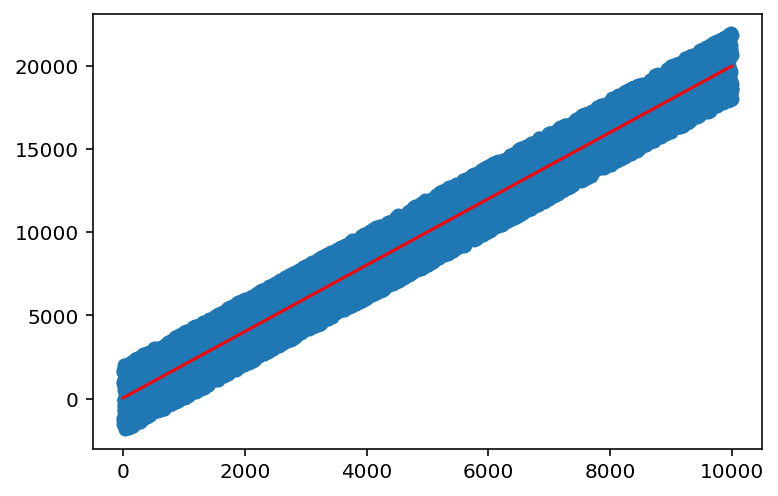

In [46]:
obj =  SimpleLinerRegression2()
%time obj.fit(x, y)
y_predict = obj.predict(x)

print('a=', obj.a)
print('b=', obj.b)

plt.scatter(x, y)
plt.plot(x, y_predict, color='r')

### 使用sklearn自带的函数

In [ ]:
from sklearn.linear_model import LinearRegression

# 待补充

## 模型评价

### MSE

$$
\frac{1}{m} \sum_{i=1}^{m}\left(y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right)^{2}
$$

In [48]:
np.dot(y_predict - y, y_predict - y) / len(y)

13416351247.883314

### RMSE

$$
\sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(y_{\text {tare }}^{(10)}-\dot{y}_{\text {irst }}^{(i)}\right)^{2}}=\sqrt{M S E_{\text {tert }}}
$$

In [50]:
import math
math.sqrt(np.dot(y_predict - y, y_predict - y) / len(y))

115828.97412946087

### MAE

$$
\frac{1}{m} \sum_{i=1}^{m}\left|y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right|
$$

In [51]:
np.sum(np.absolute(y-y_predict)) / len(y)

1003.0376257644824

### R Square

$$
1-\frac{M S E(\hat{y}, y)}{\operatorname{Var}(y)}
$$

In [53]:
1 - np.dot(y_predict - y, y_predict - y)/len(y)/np.var(y) 

0.9611252663009341